In [32]:
%matplotlib inline
import numpy as np
import glob
import os
from skimage import io
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [34]:
d = r'I:\IMPORTANT DATA\DATA_X\M232_ofc\06-11-2017'
start_frame = 1
end_frame = 100

d_denoised = os.path.join(d, 'den_bg.tif')
d_residual = os.path.join(d, 'res.tif')
d_bg = os.path.join(d, 'bg.tif')

raw_dir = glob.glob(os.path.join(d, '*z'))
d_raw = glob.glob(os.path.join(raw_dir[0], '*.tif'))[0]

In [35]:
bg = io.imread(d_bg)
residual = io.imread(d_residual)
denoised = io.imread(d_denoised)
raw = io.imread(d_raw)

In [12]:
bg = bg[start_frame:end_frame]
residual = residual[start_frame:end_frame]
denoised = denoised[start_frame:end_frame]
raw = raw[start_frame:end_frame]

In [36]:
def plot_weights():
    fig, axs = plt.subplots(2, 2, figsize=(8, 8))
    plt.style.use('dark_background')
    print(axs[0,0])
    im0 = axs[0,0].imshow(raw[0], cmap = 'gray')
    axs[0,0].axis('tight')
    axs[0,0].axis('off')
    axs[0,0].set_title('raw')
    return fig, im0

def ani_frame(fps = 30):

    def update_img(n):
        im0.set_data(raw[n,:,:])
        return im0

    fig, im0 = plot_weights()
    ani = animation.FuncAnimation(fig, update_img, end_frame, interval=1)
    writer = animation.writers['ffmpeg'](fps=fps)
    dpi = 200
    ani.save('help.mp4', writer=writer, dpi=dpi)
    return ani

AxesSubplot(0.125,0.536818;0.352273x0.343182)


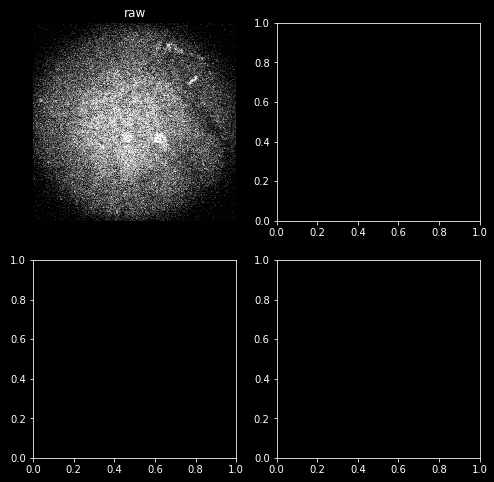

In [37]:
ani_frame(fps=30)